# 키워드

- 1. 인덱스 검색
- 2. 마스킹검색/ 빈값(NaN) 제외 연산 / 처리 
- 3. 문자열 값 순서 검색하기 (열의 자료를 행 인덱스로 변경)

In [1]:
# 판다스 가져오기 및 별칭 설정
import pandas as pd
import numpy as np
from IPython.display import Image
# 판다스 버전확인
pd.__version__

'1.2.4'

## 2.4 인덱스 검색
 - 파이썬의 인덱스 검색은 오로지 하나의 객체만 인자로 받아서 처리하는 것을 원칙으로 한다.
 
 - 파이썬 슬라이싱을 지원하는 slice 클래스가 존재한다.
 - 이 클래스는 하나의 객체에 대해 슬라이싱 검색 / 처리합니다.
 
 - 파이썬의 인덱스 검색이나 슬라이싱 검색을 위한 대괄호[] 연산자와 매치되는 스페셜 메소드는 __getitem__입니다.
 - 판다스도 인덱스 검색/ 슬라이싱검색 지원함
 - 판다스도 __getitem__을 구현하고 이 스페셜 메소드를 확장해서 처리하는 구조임
 - 인덱스 검색을 위한 판다스 클래스인 시리즈는 행단위로 구성되어 행기준을 검색합니다.
 - 그러나 데이터프레임은 열단위로 구성되어 있으므로 기본적인 인덱싱을 사용하며 열단위로 조회가됩니다.

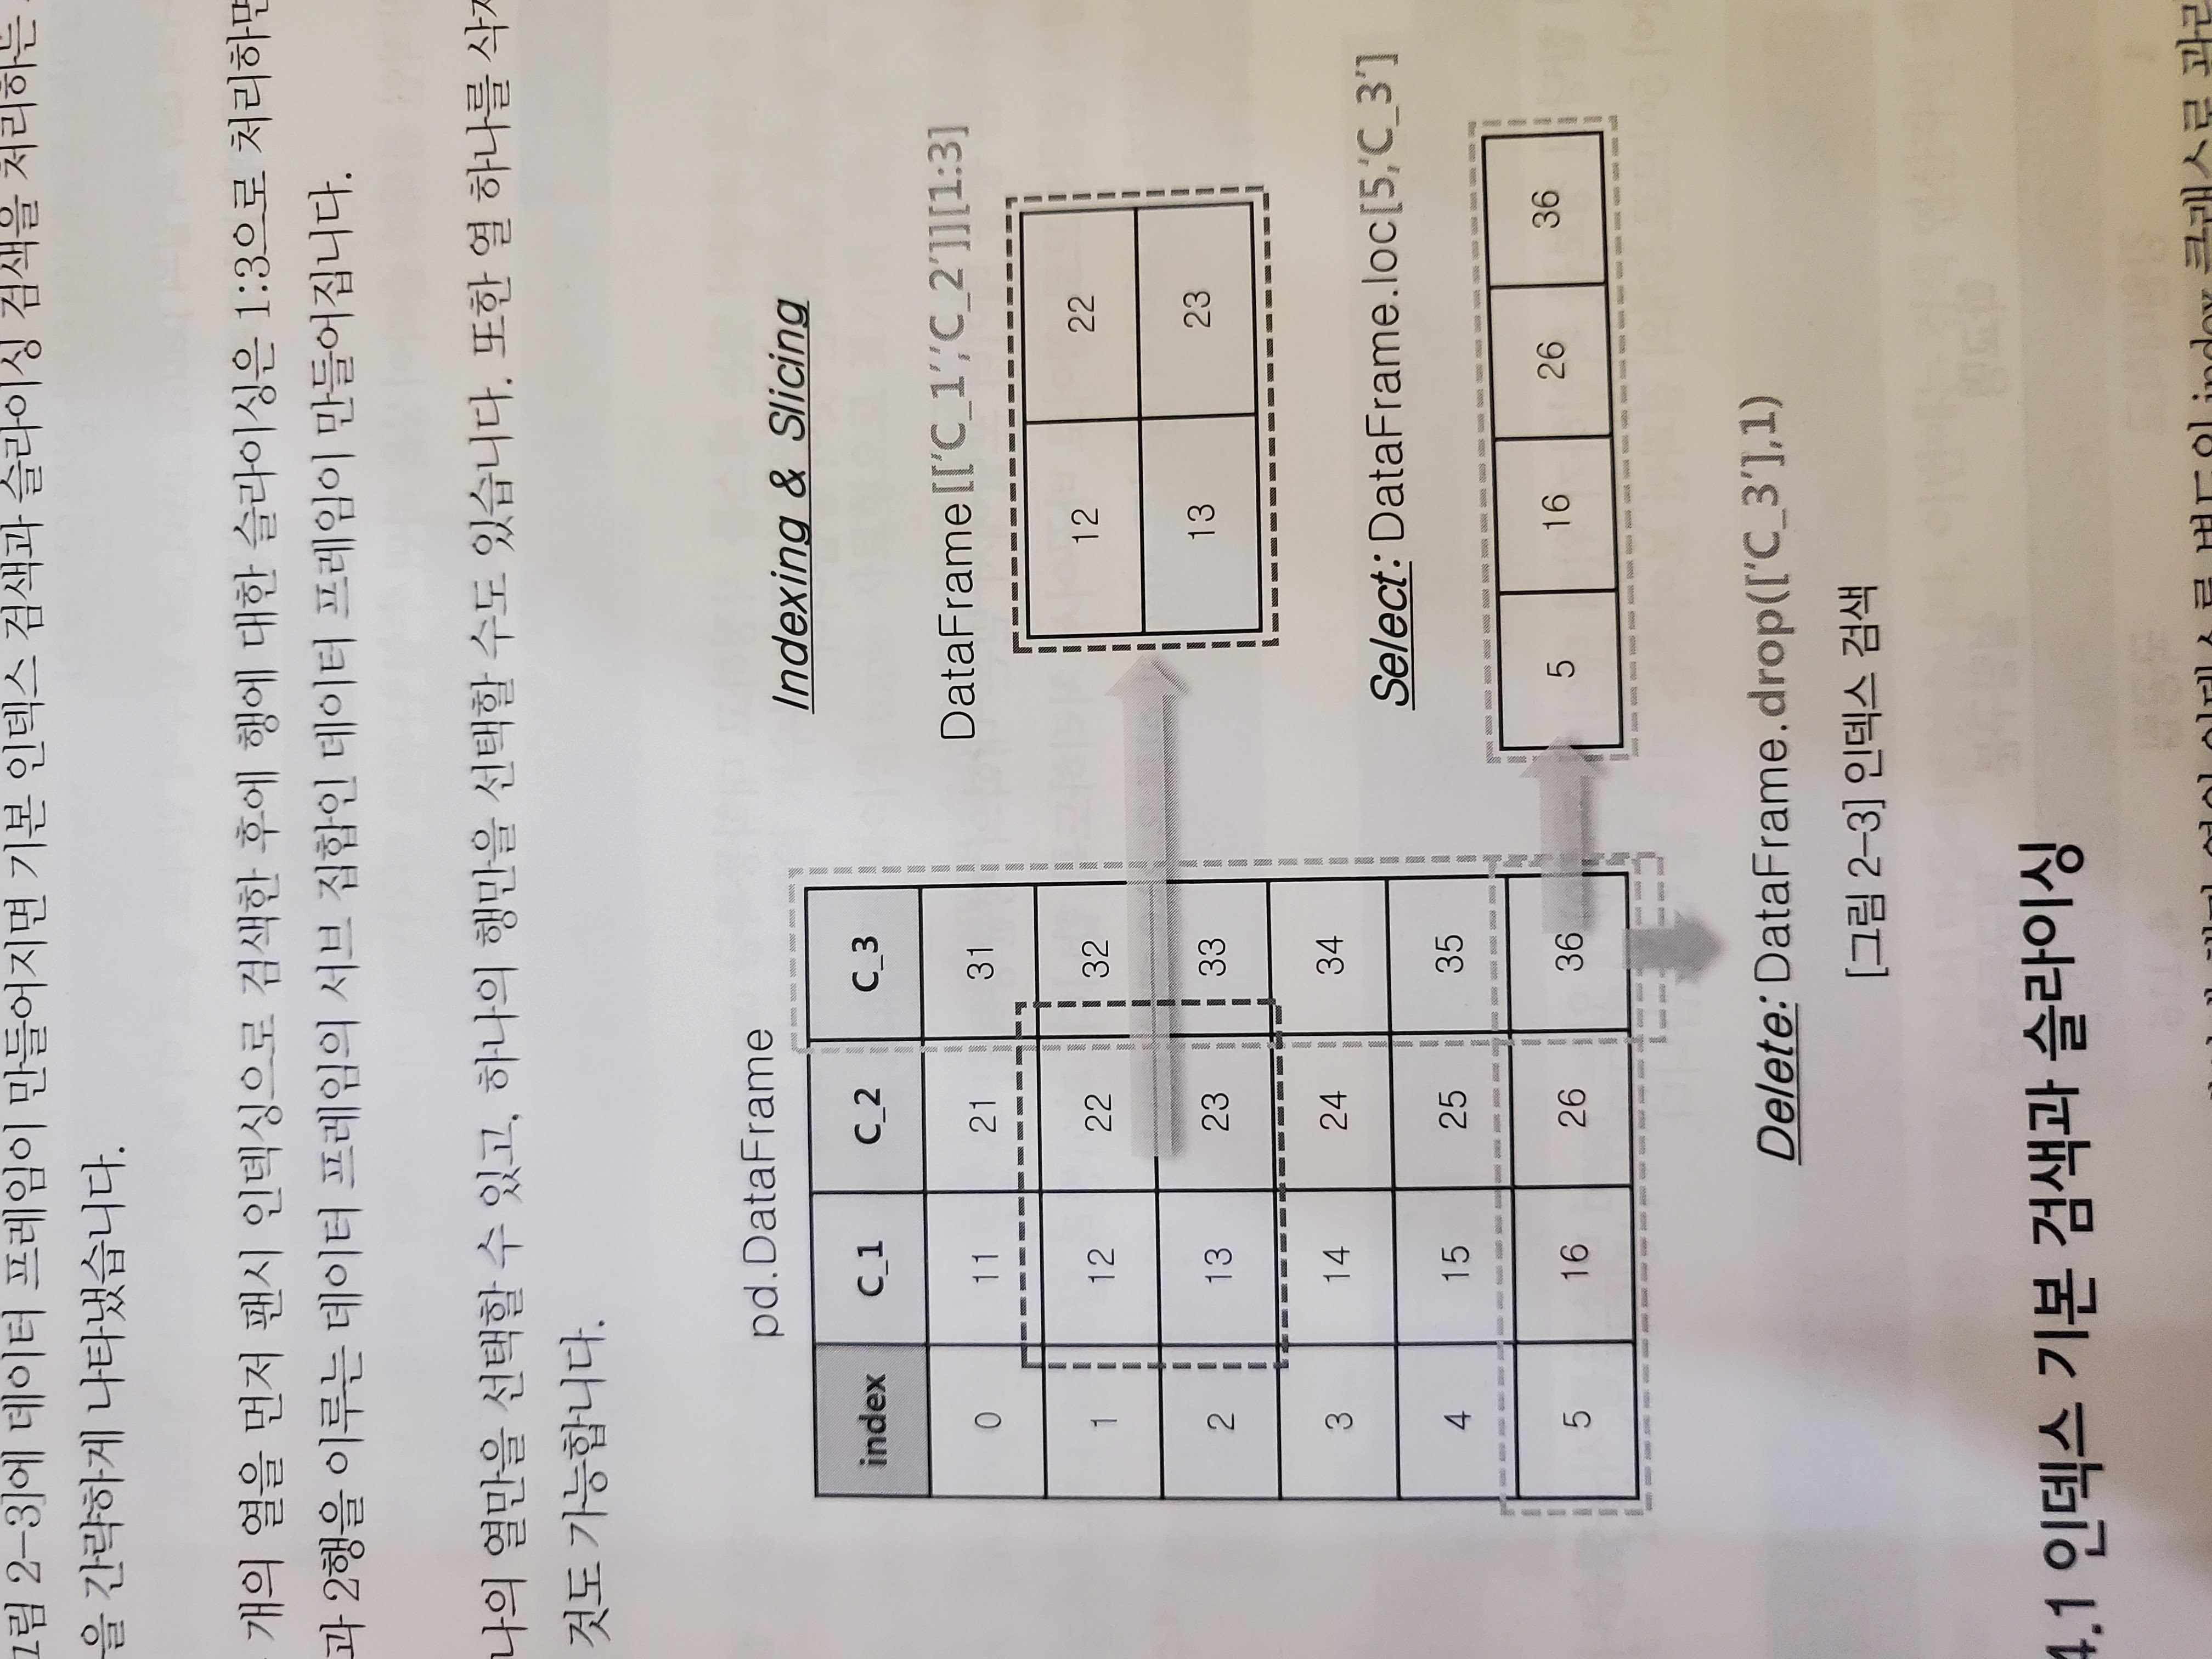

In [2]:
Image( 'C:/Users/ad/Desktop/일지/3주차 파이썬/res/res/KakaoTalk_20210714_150152009.jpg')

 - 두개의 열을 팬시 인덱싱으로 검색후 행에대한 슬라이싱 처리는 1:3으로 처리하면
 - 2열과 2행을 이루는 데이터 프레임의 서브 집합인 데이터 프레임이 만들어집니다.
 - 하나의 열만 선택할 수 있고 하나의 행만 선택 할 수있습니다. 또한 열 하나를 삭제하는 것도 가능합니다.

### 2.4.1 인덱스 기본 검색과 슬라이싱
 - 판다스 시리즈와 데이터프레임에 행과열의 인덱스를 별도의 index 클래스로 관리하는 이유가 있다.
 - 시리즈와 데이터프레임의 원소를 검색하거나 갱신할 때도 사용하지만 기본 인덱스가 아닌 멀티 인덱스를 처리할 수 있는 구조로 만든것
 - 인덱싱 연산자인 대괄호를 가지고 행과 여의 레이블로 간단하게 검색가능

 - 판다스에서는 슬라이싱 검색도 레이블의 정보를 가지고 시리즈나 데이터 프레임의 행단위 검색 가능 
 - 다만 슬라이싱 한 결과는 별도의 사본이 아니라 기존 데이터 프레임의 뷰역할을 한다.

#### 데이터 프레임의 일반 검색 알아보기

In [3]:
import chardet

def find_encoding(filename):
    read_file = open(filename, 'rb').read()        # 파일 읽기모드 rb는 read + 바이너리 파일( 바이너리 파일 읽을때 사용 )
    result    = chardet.detect(read_file)
    charenc   = result['encoding']
    return charenc
# 읽을 파일 인코딩 알기위한 함수
# chardet.detect(파일경로) 하면 딕셔너리형태로 인코딩등의 결과를 반환함

csv_path = "C:/Users/ad/Desktop/일지/개인필기/PYTHON/데이터 분석/데이터 분석/판다스/경기도_양주시_대부업 현황_20210713.csv"
csvpath_encoding = find_encoding(csv_path)
df_f = pd.read_csv(csv_path, encoding= csvpath_encoding)

print(f'이 파일의 인코딩은{csvpath_encoding}입니다.')
df_f

이 파일의 인코딩은EUC-KR입니다.


,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
0,1,경기도 양주시,대부업,영업중,2021-경기양주-0002-대부,민락대부,서숙희,개인,NaN,경기도 양주시 은현면 화합로941번길 310,11427,2021-03-29,2023-03-28,양주시 기업경제과,031-8082-6033
1,2,경기도 양주시,대부업,영업중,2021-경기양주-0001-대부,오성대부,나채식,개인,NaN,"경기도 양주시 부흥로 1932, 5층 123호 (광사동)",11492,2019-10-30,2022-10-30,양주시 기업경제과,031-8082-6033
2,3,경기도 양주시,대부업,영업중,2020-경기양주-0009,몬스터홀딩스대부,유혁연,개인,NaN,"경기도 양주시 평화로 1281, A동 1층 (산북동)",11497,2020-10-29,2023-10-29,양주시 기업경제과,031-8082-6033
3,4,경기도 양주시,대부업,영업중,2020-경기양주-0008,대신대부,이범훈,개인,NaN,경기도 양주시 광적면 광적로155번길 131,11420,2020-09-25,2023-09-25,양주시 기업경제과,031-8082-6033
4,5,경기도 양주시,대부중개업,영업중,2020-경기양주-0007,뉴하이론 캐피탈 대부중개,주정만,개인,1688-7568,"경기도 양주시 평화로1479번길 12, 원재빌딩 3층 301,302호 (덕계동)",11440,2020-09-09,2023-09-09,양주시 기업경제과,031-8082-6033
5,6,경기도 양주시,대부업,영업중,2020-경기양주-0006,대교대부,이종민,개인,NaN,"경기도 양주시 광적면 광적로 85-18, 상가동 204-2호 (희망아파트)",11420,2020-06-29,2023-06-29,양주시 기업경제과,031-8082-6033
6,7,경기도 양주시,대부업,영업중,2020-경기양주-0005,알찬대부,이승희,개인,031-867-2335,"경기도 양주시 평화로 1448, 1층 (덕계동)",11444,2020-04-01,2023-04-01,양주시 기업경제과,031-8082-6033
7,8,경기도 양주시,대부업,영업중,2020-경기양주-0003,삼덕대부 주식회사,안경민,법인,031-871-6618,경기도 양주시 백석읍 중앙로 223,11516,2020-02-13,2023-02-12,양주시 기업경제과,031-8082-6033
8,9,경기도 양주시,대부중개업,영업중,2019-경기양주-0005,한국대부중개,백성민,개인,NaN,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033
9,10,경기도 양주시,대부업,영업중,2019-경기양주-0004,한국대부캐피탈,백성민,개인,031-829-5837,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033


In [4]:
# 데이터 분석 기본파악
# 형식(shape, columns, dtype)
# head,tail
# index, columns
print(df_f.head(1))
print()
print(df_f.tail(1))
print()
print(df_f.shape) # 행 / 열
print()
print(df_f.columns)
print()
print(df_f.index)

   순번     시군구명 등록신청사업 영업구분              등록증번호    상호  대표자 법인여부 사업장 전화번호  \
0   1  경기도 양주시    대부업  영업중  2021-경기양주-0002-대부  민락대부  서숙희  개인       NaN   

                   소재지(도로명)   우편번호        등록일자    유효기간만료일자       관리기관  \
0  경기도 양주시 은현면 화합로941번길 310  11427  2021-03-29  2023-03-28  양주시 기업경제과   

       관리기관 전화번호  
0  031-8082-6033  

    순번     시군구명 등록신청사업 영업구분      등록증번호    상호  대표자 법인여부      사업장 전화번호  \
13  14  경기도 양주시    대부업  영업중  경기양주-제71호  튼튼대부  송원석  개인   031-851-4728   

                  소재지(도로명)   우편번호        등록일자    유효기간만료일자       관리기관  \
13  경기도 양주시 외미로 89-3 (남방동)  11501  2009-08-12  2023-08-01  양주시 기업경제과   

        관리기관 전화번호  
13  031-8082-6033  

(14, 15)

Index(['순번', '시군구명', '등록신청사업', '영업구분', '등록증번호', '상호', '대표자', '법인여부',
       '사업장 전화번호', '소재지(도로명)', '우편번호', '등록일자', '유효기간만료일자', '관리기관',
       '관리기관 전화번호'],
      dtype='object')

RangeIndex(start=0, stop=14, step=1)


#### 대괄호 이용 검색
 - 대괄호로 열검색하는 것으로 이용하는게 보통의 인덱스 검색방법이며
 - 열의 이름 하나 넣고 변수에 할당한다.
 - 데이터 프레임에서 일반적인 인덱스 검색을 하면 여러 열중에 하나의 열만 처리함.
 - 이 열은 시리즈의 인스턴스 정보를 담고 있음.
 - 이것을 head 메소드로 상위의 학교명만 조회하면 한글 자음 순서로 정렬된 학교명이 조회됨.

In [5]:
df_index = df_f['상호']
print(df_index.head())
print()
print(df_index[10]) # 이 시리즈의 10(행/ 인덱스)의 위치에 있는 값을 가져와서 출력한다.

0             민락대부
1             오성대부
2         몬스터홀딩스대부
3             대신대부
4    뉴하이론 캐피탈 대부중개
Name: 상호, dtype: object

예스대부중개


 - 파이썬의 인덱스 검색 연산자도 내부적으로는 하나의 스페셜 메소드인 __getitem__ 의 메소드입니다. 이 스페셜 메소드는
 - key 매개변수 하나만을 가지므로 시리즈일 때는 행의 인덱스인 레이블 10을 넣어 실행하면 인덱스 검색결과와 같은 결과를 표시합니다.

In [6]:
print(df_index[10])
print()
print(df_index.__getitem__(10))
print()
print(df_index.head)
print()
print(df_f.__getitem__('상호'))

# 판다스 시리즈나 데이터 프레임 클래스로 슬라이싱 검색을 처리할 때에는 행을 기준으로 처리합니다.
# ***슬라이싱 검색에서는 열단위로 처리할 수 없다 ***

예스대부중개

예스대부중개

<bound method NDFrame.head of 0              민락대부
1              오성대부
2          몬스터홀딩스대부
3              대신대부
4     뉴하이론 캐피탈 대부중개
5              대교대부
6              알찬대부
7         삼덕대부 주식회사
8            한국대부중개
9           한국대부캐피탈
10           예스대부중개
11      주식회사 이지뱅크대부
12          덕계전당포대부
13             튼튼대부
Name: 상호, dtype: object>

0              민락대부
1              오성대부
2          몬스터홀딩스대부
3              대신대부
4     뉴하이론 캐피탈 대부중개
5              대교대부
6              알찬대부
7         삼덕대부 주식회사
8            한국대부중개
9           한국대부캐피탈
10           예스대부중개
11      주식회사 이지뱅크대부
12          덕계전당포대부
13             튼튼대부
Name: 상호, dtype: object


#### 대괄호 슬라이싱 검색하기

In [7]:
print(df_index)
print()
print(df_index[5:10])

0              민락대부
1              오성대부
2          몬스터홀딩스대부
3              대신대부
4     뉴하이론 캐피탈 대부중개
5              대교대부
6              알찬대부
7         삼덕대부 주식회사
8            한국대부중개
9           한국대부캐피탈
10           예스대부중개
11      주식회사 이지뱅크대부
12          덕계전당포대부
13             튼튼대부
Name: 상호, dtype: object

5         대교대부
6         알찬대부
7    삼덕대부 주식회사
8       한국대부중개
9      한국대부캐피탈
Name: 상호, dtype: object


 - 슬라이싱 검색으로 나온결과는 항상 같은 형식이다
 - 데이터프레임에서는 데이터프레임이나오고 시리즈에서는 시리즈가나온다.
 - 차원유지

In [8]:
df_ff = df_f[:5]
df_ff

,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
0,1,경기도 양주시,대부업,영업중,2021-경기양주-0002-대부,민락대부,서숙희,개인,NaN,경기도 양주시 은현면 화합로941번길 310,11427,2021-03-29,2023-03-28,양주시 기업경제과,031-8082-6033
1,2,경기도 양주시,대부업,영업중,2021-경기양주-0001-대부,오성대부,나채식,개인,NaN,"경기도 양주시 부흥로 1932, 5층 123호 (광사동)",11492,2019-10-30,2022-10-30,양주시 기업경제과,031-8082-6033
2,3,경기도 양주시,대부업,영업중,2020-경기양주-0009,몬스터홀딩스대부,유혁연,개인,NaN,"경기도 양주시 평화로 1281, A동 1층 (산북동)",11497,2020-10-29,2023-10-29,양주시 기업경제과,031-8082-6033
3,4,경기도 양주시,대부업,영업중,2020-경기양주-0008,대신대부,이범훈,개인,NaN,경기도 양주시 광적면 광적로155번길 131,11420,2020-09-25,2023-09-25,양주시 기업경제과,031-8082-6033
4,5,경기도 양주시,대부중개업,영업중,2020-경기양주-0007,뉴하이론 캐피탈 대부중개,주정만,개인,1688-7568,"경기도 양주시 평화로1479번길 12, 원재빌딩 3층 301,302호 (덕계동)",11440,2020-09-09,2023-09-09,양주시 기업경제과,031-8082-6033


In [9]:
df_ff.shape

(5, 15)

In [10]:
df_f.__getitem__(slice(5,10)).head()

,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
5,6,경기도 양주시,대부업,영업중,2020-경기양주-0006,대교대부,이종민,개인,NaN,"경기도 양주시 광적면 광적로 85-18, 상가동 204-2호 (희망아파트)",11420,2020-06-29,2023-06-29,양주시 기업경제과,031-8082-6033
6,7,경기도 양주시,대부업,영업중,2020-경기양주-0005,알찬대부,이승희,개인,031-867-2335,"경기도 양주시 평화로 1448, 1층 (덕계동)",11444,2020-04-01,2023-04-01,양주시 기업경제과,031-8082-6033
7,8,경기도 양주시,대부업,영업중,2020-경기양주-0003,삼덕대부 주식회사,안경민,법인,031-871-6618,경기도 양주시 백석읍 중앙로 223,11516,2020-02-13,2023-02-12,양주시 기업경제과,031-8082-6033
8,9,경기도 양주시,대부중개업,영업중,2019-경기양주-0005,한국대부중개,백성민,개인,NaN,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033
9,10,경기도 양주시,대부업,영업중,2019-경기양주-0004,한국대부캐피탈,백성민,개인,031-829-5837,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033


### 2.4.2 마스킹 검색

In [11]:
df_f2 = pd.read_csv(csv_path, encoding= csvpath_encoding).dropna(axis=1)
df_f2

# dropna(axis = 1)
# 열기준으로 그 열에 NaN 값이 있으면 그 열 전체 삭제
# dropna(axis = 0)
# 행기준으로 행에 NaN 값이 있으면 그  행 전체삭제

,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
0,1,경기도 양주시,대부업,영업중,2021-경기양주-0002-대부,민락대부,서숙희,개인,경기도 양주시 은현면 화합로941번길 310,11427,2021-03-29,2023-03-28,양주시 기업경제과,031-8082-6033
1,2,경기도 양주시,대부업,영업중,2021-경기양주-0001-대부,오성대부,나채식,개인,"경기도 양주시 부흥로 1932, 5층 123호 (광사동)",11492,2019-10-30,2022-10-30,양주시 기업경제과,031-8082-6033
2,3,경기도 양주시,대부업,영업중,2020-경기양주-0009,몬스터홀딩스대부,유혁연,개인,"경기도 양주시 평화로 1281, A동 1층 (산북동)",11497,2020-10-29,2023-10-29,양주시 기업경제과,031-8082-6033
3,4,경기도 양주시,대부업,영업중,2020-경기양주-0008,대신대부,이범훈,개인,경기도 양주시 광적면 광적로155번길 131,11420,2020-09-25,2023-09-25,양주시 기업경제과,031-8082-6033
4,5,경기도 양주시,대부중개업,영업중,2020-경기양주-0007,뉴하이론 캐피탈 대부중개,주정만,개인,"경기도 양주시 평화로1479번길 12, 원재빌딩 3층 301,302호 (덕계동)",11440,2020-09-09,2023-09-09,양주시 기업경제과,031-8082-6033
5,6,경기도 양주시,대부업,영업중,2020-경기양주-0006,대교대부,이종민,개인,"경기도 양주시 광적면 광적로 85-18, 상가동 204-2호 (희망아파트)",11420,2020-06-29,2023-06-29,양주시 기업경제과,031-8082-6033
6,7,경기도 양주시,대부업,영업중,2020-경기양주-0005,알찬대부,이승희,개인,"경기도 양주시 평화로 1448, 1층 (덕계동)",11444,2020-04-01,2023-04-01,양주시 기업경제과,031-8082-6033
7,8,경기도 양주시,대부업,영업중,2020-경기양주-0003,삼덕대부 주식회사,안경민,법인,경기도 양주시 백석읍 중앙로 223,11516,2020-02-13,2023-02-12,양주시 기업경제과,031-8082-6033
8,9,경기도 양주시,대부중개업,영업중,2019-경기양주-0005,한국대부중개,백성민,개인,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033
9,10,경기도 양주시,대부업,영업중,2019-경기양주-0004,한국대부캐피탈,백성민,개인,"경기도 양주시 백석읍 양주산성로 513, 2층",11512,2019-06-19,2022-06-19,양주시 기업경제과,031-8082-6033


In [12]:
print(df_f2.dtypes)
print()
print(df_f2['우편번호'].dtype)

순번            int64
시군구명         object
등록신청사업       object
영업구분         object
등록증번호        object
상호           object
대표자          object
법인여부         object
소재지(도로명)     object
우편번호          int64
등록일자         object
유효기간만료일자     object
관리기관         object
관리기관 전화번호    object
dtype: object

int64


#### 자료형 변경
 - astype

In [13]:
df_ff['우편번호'] = df_ff['우편번호'].astype(np.object0)
df_ff.dtypes

<ipython-input-13-51b530727a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ff['우편번호'] = df_ff['우편번호'].astype(np.object0)


순번            int64
시군구명         object
등록신청사업       object
영업구분         object
등록증번호        object
상호           object
대표자          object
법인여부         object
사업장 전화번호     object
소재지(도로명)     object
우편번호         object
등록일자         object
유효기간만료일자     object
관리기관         object
관리기관 전화번호    object
dtype: object

In [14]:
df_ff['우편번호'] = df_ff['우편번호'].astype(np.int64)
df_ff['우편번호'].dtype

<ipython-input-14-6193c1720398>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ff['우편번호'] = df_ff['우편번호'].astype(np.int64)


dtype('int64')

In [15]:
(df_ff['우편번호'] > 11450).head()

0    False
1     True
2     True
3    False
4    False
Name: 우편번호, dtype: bool

In [16]:
df_ff[(df_ff['우편번호'] > 11450)]

,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
1,2,경기도 양주시,대부업,영업중,2021-경기양주-0001-대부,오성대부,나채식,개인,NaN,"경기도 양주시 부흥로 1932, 5층 123호 (광사동)",11492,2019-10-30,2022-10-30,양주시 기업경제과,031-8082-6033
2,3,경기도 양주시,대부업,영업중,2020-경기양주-0009,몬스터홀딩스대부,유혁연,개인,NaN,"경기도 양주시 평화로 1281, A동 1층 (산북동)",11497,2020-10-29,2023-10-29,양주시 기업경제과,031-8082-6033


#### 다중 논리식에 대한 불리언처리
 - 지금까지는 논리식 하나로 검색했다.
 - 그렇지만 여러개를 묵는것도 된다.
 - 파이썬은 and or not 등 사용하지만 마스킹에서는 문자로 된 논리연산자 사용불가
 - & | ~ 기호 사용 처리
 - 이 연산자는 비교 연산자보다 우선순위 낮음 논리식 여러개 작성할 때는 괄호로 묶어 명확히 처리해야함.

In [17]:
df_j = ((df_f['순번'] > 5) & (df_f['우편번호'] < 11500))

In [18]:
df_n = df_f[(df_f['순번'] > 5) & (df_f['우편번호'] < 11500)]
df_n

,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
5,6,경기도 양주시,대부업,영업중,2020-경기양주-0006,대교대부,이종민,개인,NaN,"경기도 양주시 광적면 광적로 85-18, 상가동 204-2호 (희망아파트)",11420,2020-06-29,2023-06-29,양주시 기업경제과,031-8082-6033
6,7,경기도 양주시,대부업,영업중,2020-경기양주-0005,알찬대부,이승희,개인,031-867-2335,"경기도 양주시 평화로 1448, 1층 (덕계동)",11444,2020-04-01,2023-04-01,양주시 기업경제과,031-8082-6033
10,11,경기도 양주시,대부중개업,영업중,2019-경기양주-0003,예스대부중개,박선미,개인,1661-3950,"경기도 양주시 고읍남로39번길 129-34, 1층 (광사동)",11491,2019-01-30,2022-01-30,양주시 기업경제과,031-8082-6033
12,13,경기도 양주시,대부업,영업중,경기양주-제2011-10호,덕계전당포대부,임정은,개인,031 867 8836,경기도 양주시 평화로 1433 (덕계동),11443,2020-05-19,2023-05-19,양주시 기업경제과,031-8082-6033


In [19]:
df_f[df_j]

,순번,시군구명,등록신청사업,영업구분,등록증번호,상호,대표자,법인여부,사업장 전화번호,소재지(도로명),우편번호,등록일자,유효기간만료일자,관리기관,관리기관 전화번호
5,6,경기도 양주시,대부업,영업중,2020-경기양주-0006,대교대부,이종민,개인,NaN,"경기도 양주시 광적면 광적로 85-18, 상가동 204-2호 (희망아파트)",11420,2020-06-29,2023-06-29,양주시 기업경제과,031-8082-6033
6,7,경기도 양주시,대부업,영업중,2020-경기양주-0005,알찬대부,이승희,개인,031-867-2335,"경기도 양주시 평화로 1448, 1층 (덕계동)",11444,2020-04-01,2023-04-01,양주시 기업경제과,031-8082-6033
10,11,경기도 양주시,대부중개업,영업중,2019-경기양주-0003,예스대부중개,박선미,개인,1661-3950,"경기도 양주시 고읍남로39번길 129-34, 1층 (광사동)",11491,2019-01-30,2022-01-30,양주시 기업경제과,031-8082-6033
12,13,경기도 양주시,대부업,영업중,경기양주-제2011-10호,덕계전당포대부,임정은,개인,031 867 8836,경기도 양주시 평화로 1433 (덕계동),11443,2020-05-19,2023-05-19,양주시 기업경제과,031-8082-6033


#### 시리즈에 논리식 검색하기

In [20]:
df_j2 = df_f['우편번호']
df_j2

0     11427
1     11492
2     11497
3     11420
4     11440
5     11420
6     11444
7     11516
8     11512
9     11512
10    11491
11    11518
12    11443
13    11501
Name: 우편번호, dtype: int64

In [21]:
df_j2[df_j2 > 11450 ]

1     11492
2     11497
7     11516
8     11512
9     11512
10    11491
11    11518
13    11501
Name: 우편번호, dtype: int64

### 2.4.3 팬시 검색하기
 - 특정 레이블을 직접 리스트에 넣어서 검색하는 것 == 팬시검색

In [22]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [23]:
# 기본확인
titanic.tail
titanic.columns
titanic.index
titanic.shape
titanic.info
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [24]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [25]:
# 타이타닉의 기존 컬럼들을 조합하여 새로운 데이터 프레임 만들기
titanic_new = titanic[ [ 'age', 'sex', 'alive' ] ]
titanic_new.head()

,age,sex,alive
0,22.0,male,no
1,38.0,female,yes
2,26.0,female,yes
3,35.0,female,yes
4,35.0,male,no


In [26]:
titanic[ [ 'age', 'sex', 'alive' ] ].isnull() # isnull 사용 결측값 확인
titanic[ [ 'age', 'sex', 'alive' ] ].isnull().sum() #각 컬럼별 결측값 갯수 확인

age      177
sex        0
alive      0
dtype: int64

In [27]:
titanic [['age']].head(1)
type(titanic [['age']].head(1))

pandas.core.frame.DataFrame

In [28]:
titanic ['age'].head(1)
type(titanic ['age'].head(1))

# 대괄호 하나만하면 시리즈로 반환함

pandas.core.series.Series

In [29]:
ti_age = titanic ['age']
ti_age[[0,3,4]]

# 결과분석
# 시리즈에는 행레이블로 팬시검색 가능
# 팬시검색을 해도 시리즈로 반환함

0    22.0
3    35.0
4    35.0
Name: age, dtype: float64

## 2.5 인덱서 검색
 - *** 판다스는 기본적으로 데이터 프레임의 인덱스 검색을 처리할때 열기준으로 제공 ***
 - *** 판다스는 기본적으로 시리즈의 인덱스 검색을 처리할때 행기준으로 제공 ***

 - 데이터 프레임의 행단위 검색 처리하기 위해서는
 - 별도의 인덱서 클래스를 속성으로 제공해서 가능하게 한다.

### 2.5.1 명시적 인덱서 암묵적 인덱서
 - .loc 는 명시적인 레이블 이용
 - .iloc는 암묵적 레이블을 사용한다.

#### 명시적 인덱서 검색(.loc)
 - 명시적 인덱서를 사용한다는 것은 시리즈나 데이터프레임을 만들때 .index와 .columns 속성 정보를 이용한다는 의미

In [30]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [31]:
# 기본확인
diamonds.tail
diamonds.columns
diamonds.index
diamonds.shape
diamonds.info
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [32]:
diamonds.loc[0]

# 0(index)행을 출력

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

 - 데이터프레임.loc[첫번째인자, 두번째인자]
 - 첫번째 인자는 행(index)
 - 두번째 인자 열(column)

In [33]:
diamonds.loc[0, 'carat']

0.23

 - 파이썬 슬라이싱도 인덱서에서는 행과 열에 전부 사용가능하다.

In [34]:
diamonds.loc[:,:].head(1) # 행 슬라이싱[:], 열슬라이싱[:] == 전부 다 출력해라
diamonds.loc[1:5, 'carat'] # carat 열(컬럼)의 index 1~4 까지 가져와라
diamonds.loc[1:5, 'carat':'color'] # 행 1~5 열 carat 부터 color 가지 가져와라 끝에꺼 -1 안하네.?

,carat,cut,color
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I
4,0.31,Good,J
5,0.24,Very Good,J


In [35]:
diamonds.loc[:,'carat'].head() # 'carat'열의 모든행을 가져와라 

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [36]:
diamonds['carat'].head() # 'carat' 열을 출력해라

# 즉 위의 명시적 인덱서와 같은 결과를 가져올 수 있다.

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

 -  인덱서로 데이터 프레임의 결과가 나오면 열의 인자를 넣을 때 팬시검색을 할수 있는 이름의 리스트를 넣고 실행
 -  하나의 열을 리스트로 넣어 팬시검색을 하면 하나의 열을 갖는 데이터 프레임이 만들어 져반환됨

In [37]:
diamonds.loc[:, ['carat']]


,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31
...,...
53935,0.72
53936,0.72
53937,0.70
53938,0.86


In [38]:
diamonds.loc[[0,1]]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [39]:
diamonds['carat']      # 인덱싱 시 대괄호 하나면 시리즈
diamonds[['carat']]    # 대괄호 2개면 2차원유지 데이터프레임 반환

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31
...,...
53935,0.72
53936,0.72
53937,0.70
53938,0.86


- .xs 매소드를 가지고 행과 열을 중심으로 데이터를 가지고 올 수 있다.
- .xs 매소드는 기본은 행단위이다.

In [40]:
diamonds.xs(0)

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

In [41]:
diamonds.xs("carat", axis=1).head()
# axis=1 옵션을 주면 열 중심 조회 가능

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

 - 특정 행과 열의 레이블을 지정해서 원소값만 처리하려면 .lookup 매소드 이용하면 된다.
 - .lookup 매소드의 인자값은 리스트로 행과 열의 매칭정보를 주면 해당 값만 검색해서 남파이 배열로 반환한다.
 - lookup 대신 melt 사용한다.

In [42]:
diamonds.lookup([0,1], ['carat', 'cut'])

<ipython-input-42-7302de5dc020>:1: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  diamonds.lookup([0,1], ['carat', 'cut'])


array([0.23, 'Premium'], dtype=object)

#### 암묵적 인덱서 검색하기 .iloc


In [43]:
diamonds.loc[0]

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

In [44]:
diamonds.iloc[0]

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

 - 위의 결과와(loc) 아래의결과(iloc) 모두 0을 넣었다. 같은 결과가 나왔지만 같은 것은아니다.
 - 암묵적인덱서(iloc)는 레이블과 상관없이 모든것을 0부터 접근하여 처리하낟.
 - 데이터 프레임의 첫번째 행은 암묵적인 포지션이기때문에 매번 0이므로 암묵적인덱서인 iloc에 넣으면 항상 첫번째 행으로만 인식됨
 - 같은말로 loc(명시적인덱서)의 0은 diamond 데이터프레임의 첫번째 행의레이블(index)이 0이기 때문이다.

In [45]:
print(diamonds.iloc[0,0])
# 행과 열의 인자에 0을 넣음 iloc니까 둘다 암묵적 포지션(인덱스)
print()
print(diamonds.iloc[0,[0]])
print()
print(diamonds.iloc[0,[0,1,2]])
print()
print(diamonds.iloc[[0],[0,1,2]])
print()
print(diamonds.iloc[:5, :3])
print()


0.23

carat    0.23
Name: 0, dtype: object

carat     0.23
cut      Ideal
color        E
Name: 0, dtype: object

   carat    cut color
0   0.23  Ideal     E

   carat      cut color
0   0.23    Ideal     E
1   0.21  Premium     E
2   0.23     Good     E
3   0.29  Premium     I
4   0.31     Good     J



In [46]:
diamonds.iloc[:5, 0]

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

#### 명시적 인덱서 .loc 복합검색
 - 레이블을 가지고 처리하고 슬라이스, 논리검색과 팬시검색을 연결하여 다양한 검색을 수행할 수 있다.

In [47]:
diamonds.head(1)
#diamonds.columns

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [48]:
((diamonds['carat'] == 0.23)  & (diamonds['cut'] == 'Very Good'))

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [49]:
(diamonds['carat'] == 0.23).head(1)
(diamonds['cut'] == 'Very Good').head(1)
diamonds.loc[:,['carat','cut','price']].head(1)

,carat,cut,price
0,0.23,Ideal,326


In [50]:
carat_cut = diamonds.loc[ 
    ((diamonds['carat'] == 0.23) &
    (diamonds['cut'] == "Very Good")),
    ['carat','cut','color','price']
]

 -  diamonds.loc[ 
    ((diamonds['carat'] == 0.23) &
    (diamonds['cut'] == "Very Good")),
    ['carat','cut','color','price'] ]

    명시적 인덱서의 [행,] 부분에 해당하고
    carat 열의 값이 0.23 이고(and) cut 컬럼의 값이 Very Good인 문자열을 가진 열을 출력하라

    , 뒤의 ['carat','cut','color','price']는 loc(명시적인덱서)의 열을 명시한것으로
    앞의 행을 출력하되 carat열 cut열 color열 price열만 출력해라 라는 의미이다. 출력은 아래와 같다.

In [51]:
carat_cut.head()

,carat,cut,color,price
9,0.23,Very Good,H,338
21,0.23,Very Good,E,352
22,0.23,Very Good,H,353
25,0.23,Very Good,G,354
28,0.23,Very Good,D,357


In [52]:
carat_cut.shape

(197, 4)

 - shape를 확인해보면 4개의 컬럼과(설정한), 197개의 결과 열이 나온것을 확인 할 수 있다.

In [53]:
diamonds.loc[:,:] # 행과 열의 부분에 :를 넣은것은 슬라이싱 처음부터 끝까지란의미로 모든 데이터프레임 출력과같다

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [54]:
diamonds.loc[0:7, 'carat':'color']

,carat,cut,color
0,0.23,Ideal,E
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I
4,0.31,Good,J
5,0.24,Very Good,J
6,0.24,Very Good,I
7,0.26,Very Good,H


In [55]:
diamonds.loc[:, ['carat','cut','color','price']].head()

,carat,cut,color,price
0,0.23,Ideal,E,326
1,0.21,Premium,E,326
2,0.23,Good,E,327
3,0.29,Premium,I,334
4,0.31,Good,J,335


### 2.5.3 내부값의 문자열일 경우 검색 처리 방식
 - 인덱서를 사용할 경우 문자열로 된 레이블을 처리할 때 문자열의 순서를가지고 검색할 수 있도록 내부적으로 지원한다.
 - 특히 슬라이스 처리할때 문자의 순서가 중요하기 때문에 순서에 맞춰 처리가 되도록 구성하는 것이 중요하다.
 - 영어는 알파벳 순으로
 - 한글도 한글 자음과 모음이 순서대로 정렬되지 않으면 예외가 발생할 수 있습니다.

#### 명시적 인덱서를 사용할 때 문자열 레이블 처리기준
##### 문자열 값 순서 검색하기 (열의 자료를 행 인덱스로 변경)
 - 위에서 만들어진 seaborn 모듈의 데이터셋을 가져와 다이아몬드 데이터 프레임을 만든 것을 먼저 color 열로 .set_index 메소드 사용하여
 - 인덱스를 정하고 새로운 변수에 할당합니다.
 - 열의 자료를 >> 행의 인덱스로 변경하는법( 데이터프레임.set_index)

In [56]:
diamonds.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [62]:
set_i = diamonds.set_index('color')
set_i.head(1)

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
E,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43


 - 인덱서를 사용하기위해 color를 행인덱스로 바궜다. 컬러의 내용은 E,F이다.

In [61]:
# try:
#     set_i.loc['E':'F']
# except ValueError as e :
#     print('ValueError', e)
# except KeyError as e:
#     print('KeyError', e)


set_i.loc['E':'F']
# 'E' 'F'가 정렬되어있지 않기 때문에 예외(에러) 발생

AttributeError: 'function' object has no attribute 'loc'

In [63]:
set_i.loc['E':'F']

KeyError: "Cannot get left slice bound for non-unique label: 'E'"

 - 데이터프레임.iterrows 는 데이터프레임을 반복 가능한 개체로 만들어줌

In [59]:
for i in diamonds.iterrows():
    print(i)
    break

# 행단위 가져옴

(0, carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object)


# 주피터 노트북과 파이썬을 이용한 데이터분석
## 손에 잡히는 판다스
### 문용준 지음 _ 2018.11.30 
#### 비제이퍼블릭 발행
##### 60 2.4 인덱스검색 부터 ~ 84 2.5.3 문자열일 경우 검색처리 방식 전까지